In [2]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:* Estefania Zapata Valderrama

*Identificación:* 1006373242

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



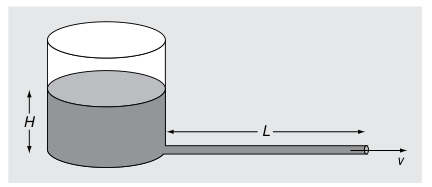

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [32]:
#INCISO A)
#Definir la funcion para la velocidad del agua
from math import sqrt
g= 9.81 #(m/s**2)
l= 4 #(m)
t= 2.5 #(s)

def v(h):
 return (sqrt(2*g*h)*(np.tanh(sqrt(2*g*h*t)/(2*l))))






TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
#INCISO B)
g= 9.81 #(m/s**2)
l= 4 #(m)
t= 2.5 #(s)
h = np.linspace(0,5,100)
v_vals = v(h)


plt.figure()
plt.plot(h,v_vals,color='blue')
plt.xlabel('Carga Hidrostatica H')
plt.ylabel('Velocidad V')
plt.title('H vs V')
plt.grid()
plt.show()

In [39]:
#INCISO D)
def biseccion(f, a, b, tol):
    while (b - a)/2 > tol:
        c = (a + b)/2

        if f(c) == 0:
            return c

        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c

    return(a + b)/2

In [49]:
biseccion(v,1,2,(1*np.e**(-7))) #utilizo el codigo anterior y evaluo en 2 puntos dentro del rango (o,5)

1.99951171875

In [51]:
#INCISO E)

#derivada de la funcion con newton
root = newton(v, 1, fprime) #para newton ingreso la funcion, un valor y la derivada de la funcion
f


NameError: name 'fprime' is not defined

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [24]:
# Aqui va su código
#definir f primero


def diferenciacion(c,t):

  (f(c+1)-f(c))/(t) #para el primer punto

  f(c)-f(c-1)/(t) #atras

 (f(c+1)-f(c-1))/(2t) #para el ultimo punto


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




In [53]:
lagrange?

In [57]:
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])

from scipy import scipy.interpolate
poly_lagrange = lagrange(t,c)
poly_hermite =

SyntaxError: invalid syntax (<ipython-input-57-ab935e885dab>, line 4)

In [56]:
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada